In [18]:
source("src/plots/plot_effect_surface.R")
options(repr.plot.height=7, repr.plot.width=15)

# Methods

### Treatment effect estimation

1. Linear model
2. k-nearest-neighbor
3. Random Forest (T-learner)
4. (Generalized Random Forests)

### Conditional mean estimation
5. (Local-Linear Forests)

## Treatment effect case

### Linear model

#### Model

$$Y_i = \beta_0 + \sum_{j=1}^p \beta_j (X_i)^j + \tau_0 W_i + \sum_{j=1}^p \tau_j W_i (X_i - \bar{X})^j + \text{noise}$$

#### Predictions

Estimate coefficients via ordinary least squares and evaluate model on new data ...


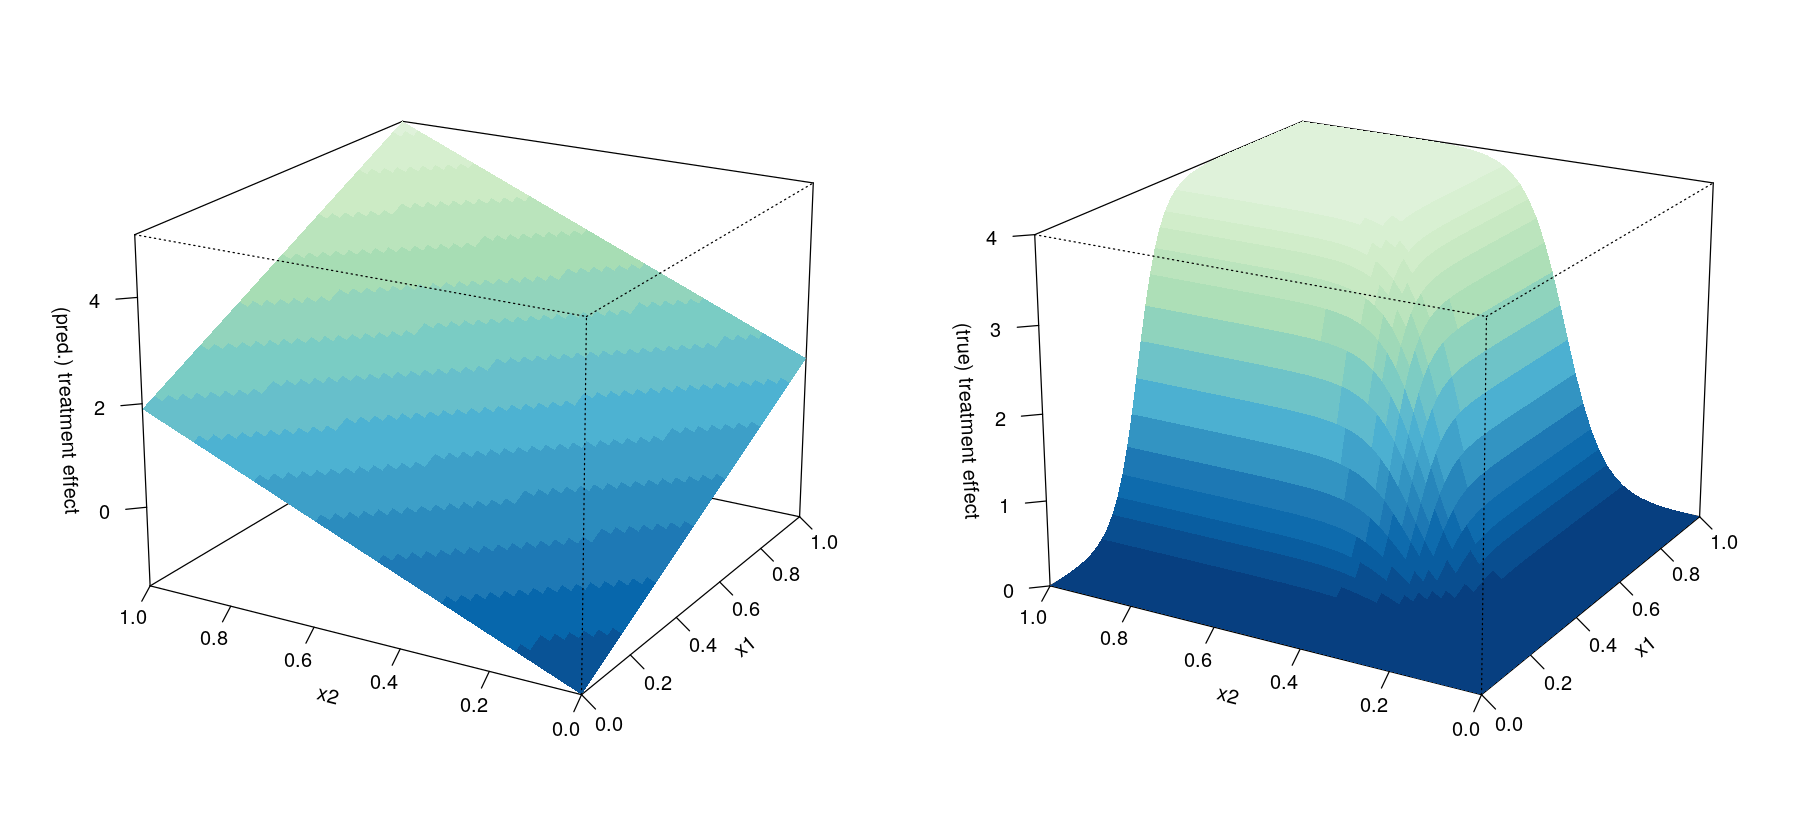

In [65]:
plot_surface("ols", "complex", p=1, interaction=TRUE, d=2, n=5000)
# plot_surface("ols", "complex", p=5, interaction=TRUE, d=2, n=5000)
# plot_surface("ols", "complex", p=5, interaction=TRUE, d=6, n=5000)

### k-nearest-neighbor

$$\tau_{knn}(x) = \frac{1}{k} \sum_{i \in \mathcal{S}_1(x)} Y_i - \frac{1}{k} \sum_{i \in \mathcal{S}_0(x)} Y_i \,\,,$$
where $\mathcal{S}_1$ and $\mathcal{S}_0$ are the $k$ nearest neighbors to $x$ in the treatment and control samples, respectively.

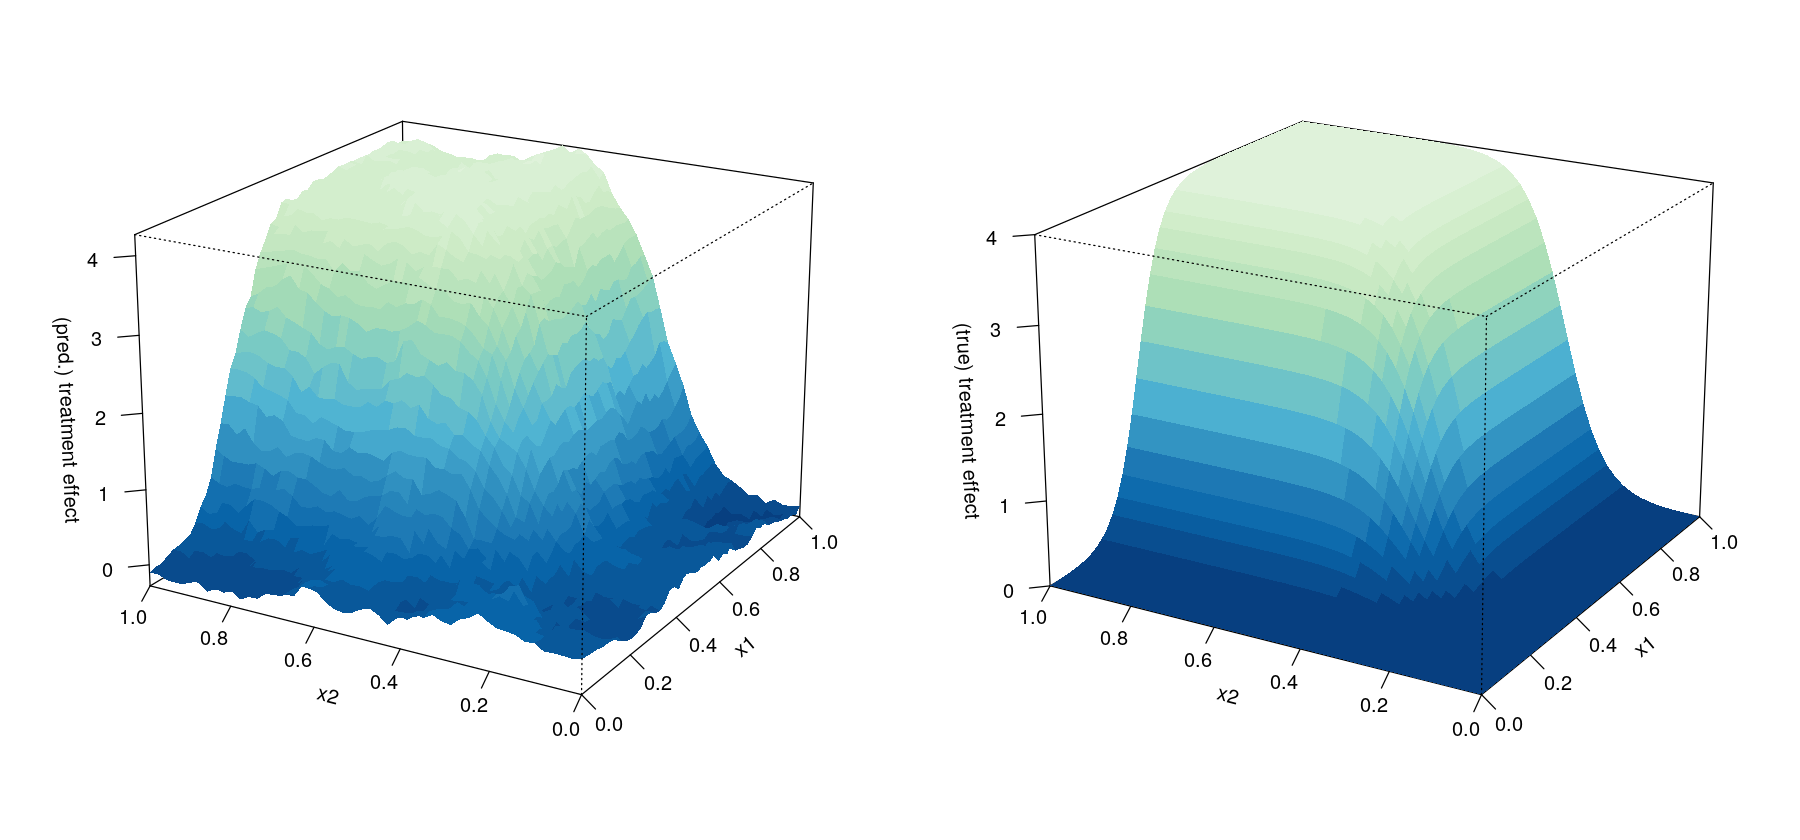

In [32]:
plot_surface("knn", "complex", k=100, d=2, n=5000)
# plot_surface("knn", "complex", k=100, d=10, n=5000)

### Random Forest T-learner

Recall: $\tau(x) = \mu_1(x) - \mu_0(x) = \mathbb{E}[Y_i \mid W_i = 1, X_i = x] - \mathbb{E}[Y_i \mid W_i = 0, X_i = x]$.

$$\hat{\tau}_{RF}(x) = \hat{\mu}_{RF}^{(1)}(x) - \hat{\mu}_{RF}^{(0)}(x) \,\,,$$

where $\hat{\mu}_{RF}^{(w)}(x)$ is the prediction for the "$w$" potential outcome at point x, from a Random Forest that was trained using only data with treatment status $w$.

Note: that the Random Forest algorithm here can be substituted with nearly any other algorithm. In fact, all of the methods mentioned before can be thought of as *T-learner methods*.

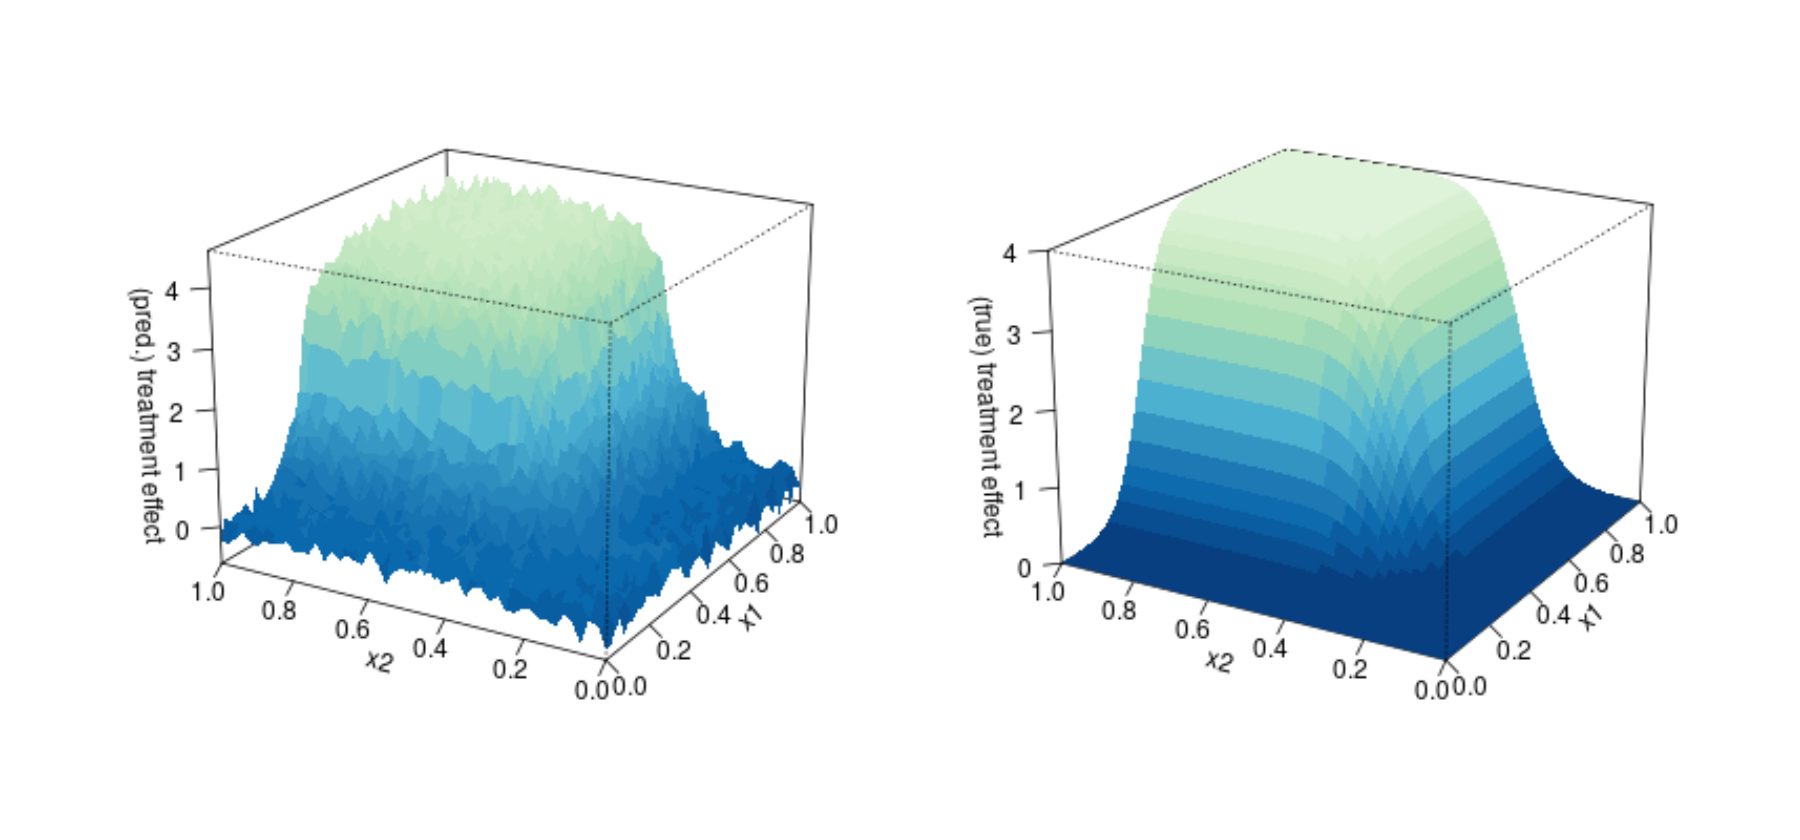

In [34]:
plot_surface("trf", "complex", d=2, n=5000)
# plot_surface("trf", "complex", d=10, n=5000)

### Conclusions (so far)

* parametric models perform poorly under model misspecification (duh..)

* non-parametric non-adaptive methods (as k-NN)
    * perform good in small dimensions and bad in large dimensions.

* non-parametric adaptive methods (as RF T-learner)
    * can detect signal in large dimensions, presumably by automatically learning the feature representation
    * learns two conditional mean functions which can be inefficient if these are more complex than the treatment effect

### Can we do better?

Ideally, we would like to combine the feature-representation learning capabilities of the Random Forest T-learner, with the direct estimation of the treatment effect function.

$\rightsquigarrow$ Causal Forests, Generalized Random Forests, Local-Linear Forests

### Generalized Random Forest

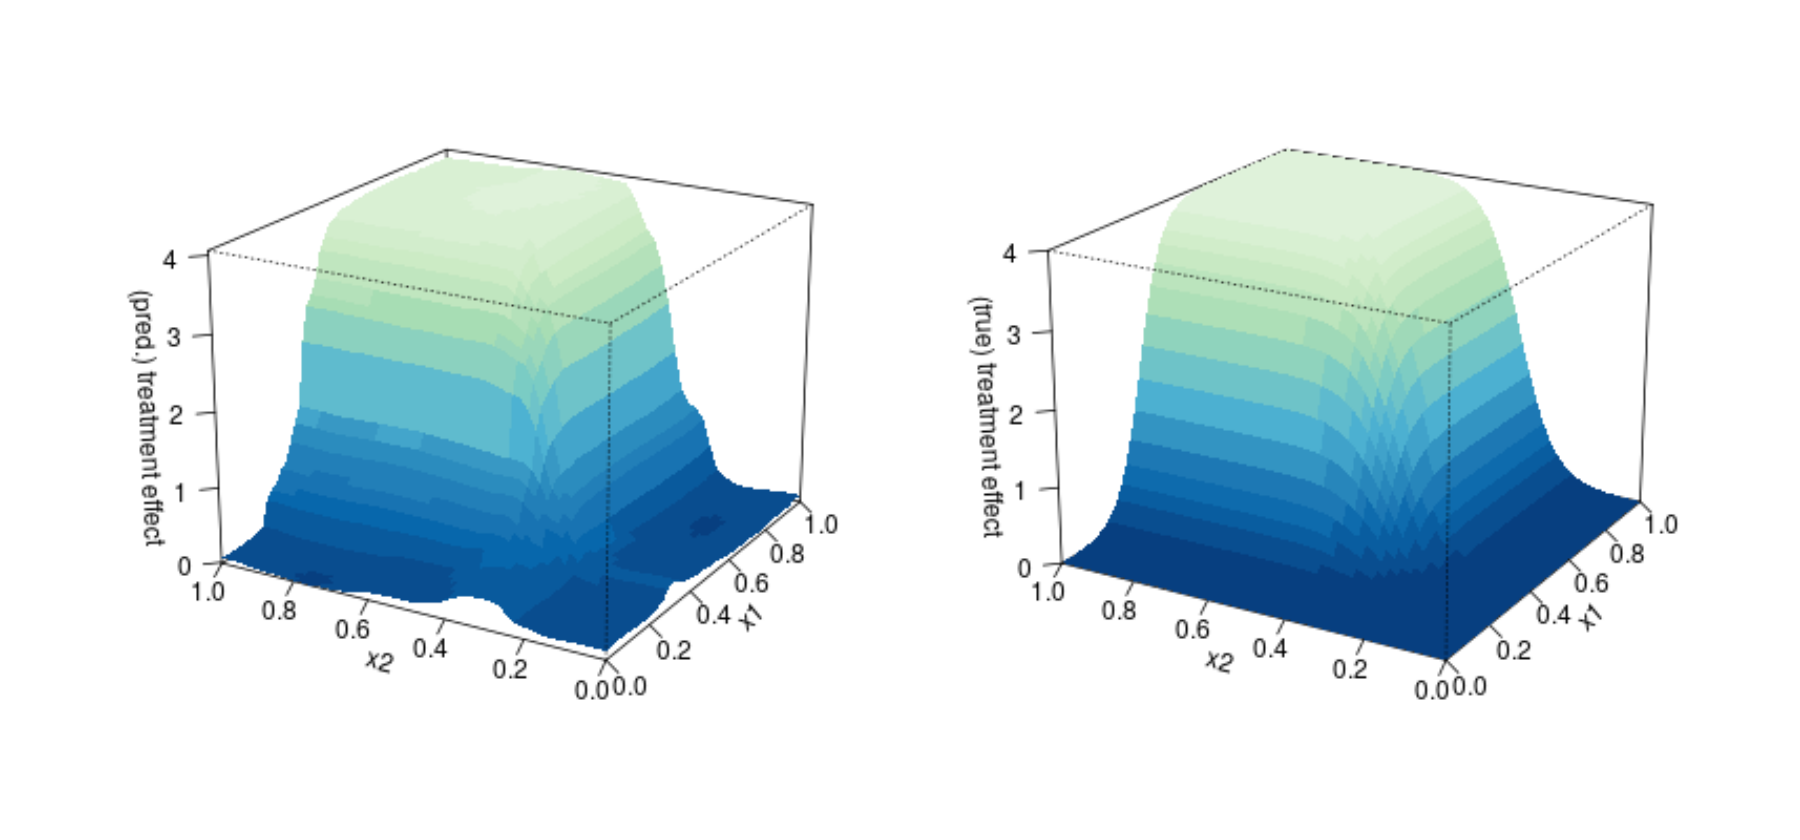

In [48]:
plot_surface("grf", "complex", n=5000, d=2)
# plot_surface("grf", "complex", n=5000, d=10)

## Conditional Mean Estimation

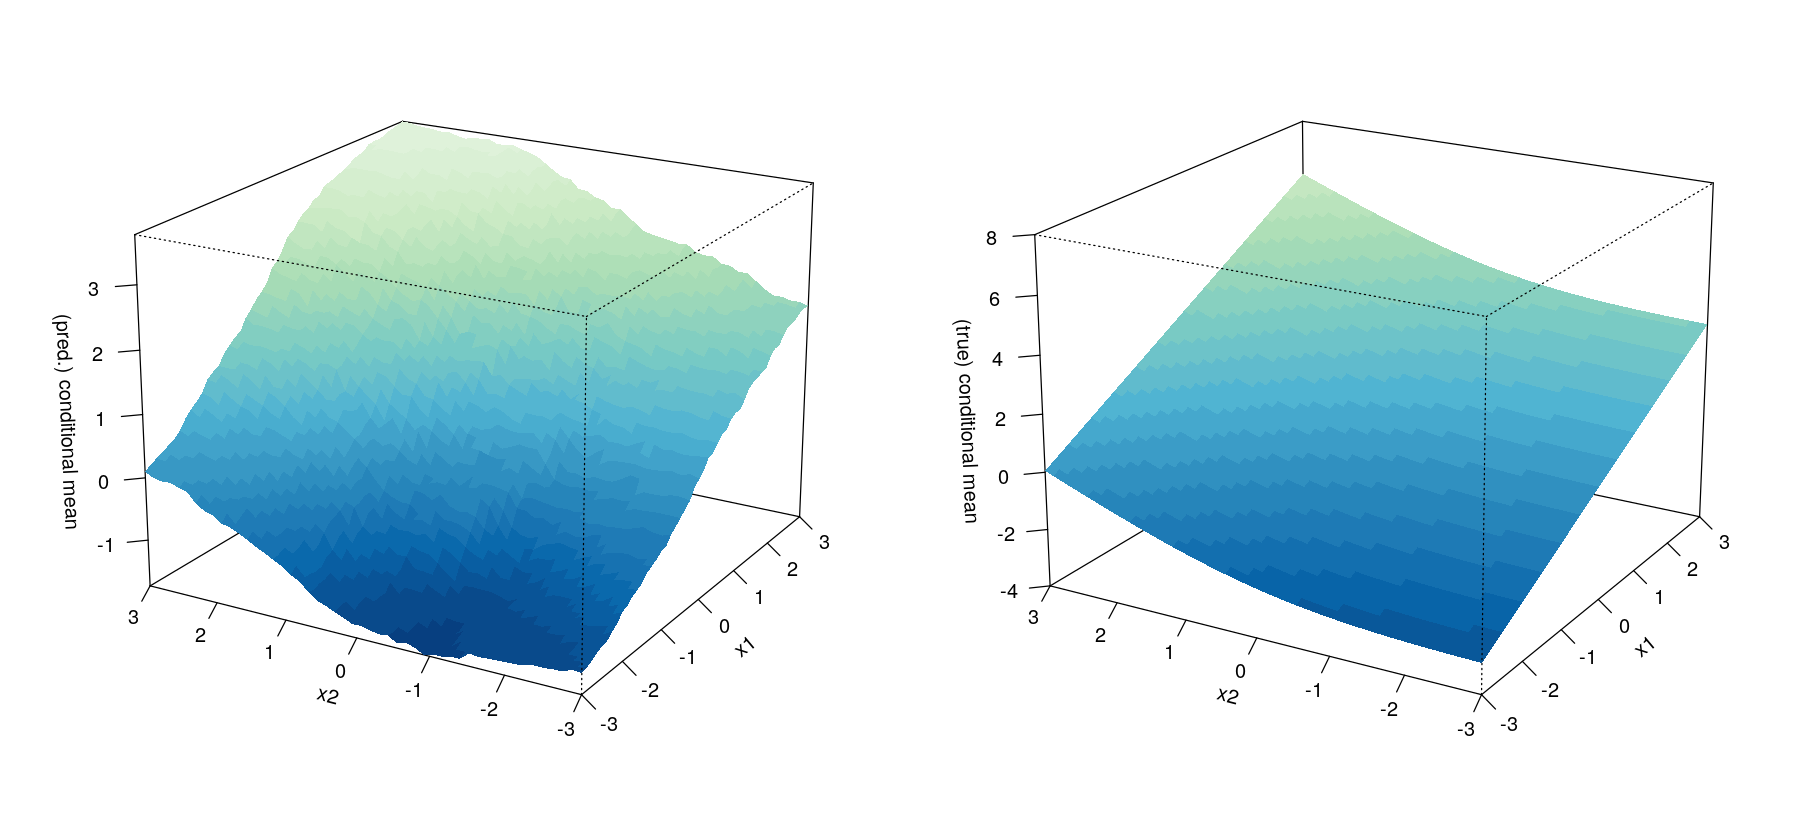

In [53]:
plot_surface("knn", "boundary", k=100, d=2, n=5000)

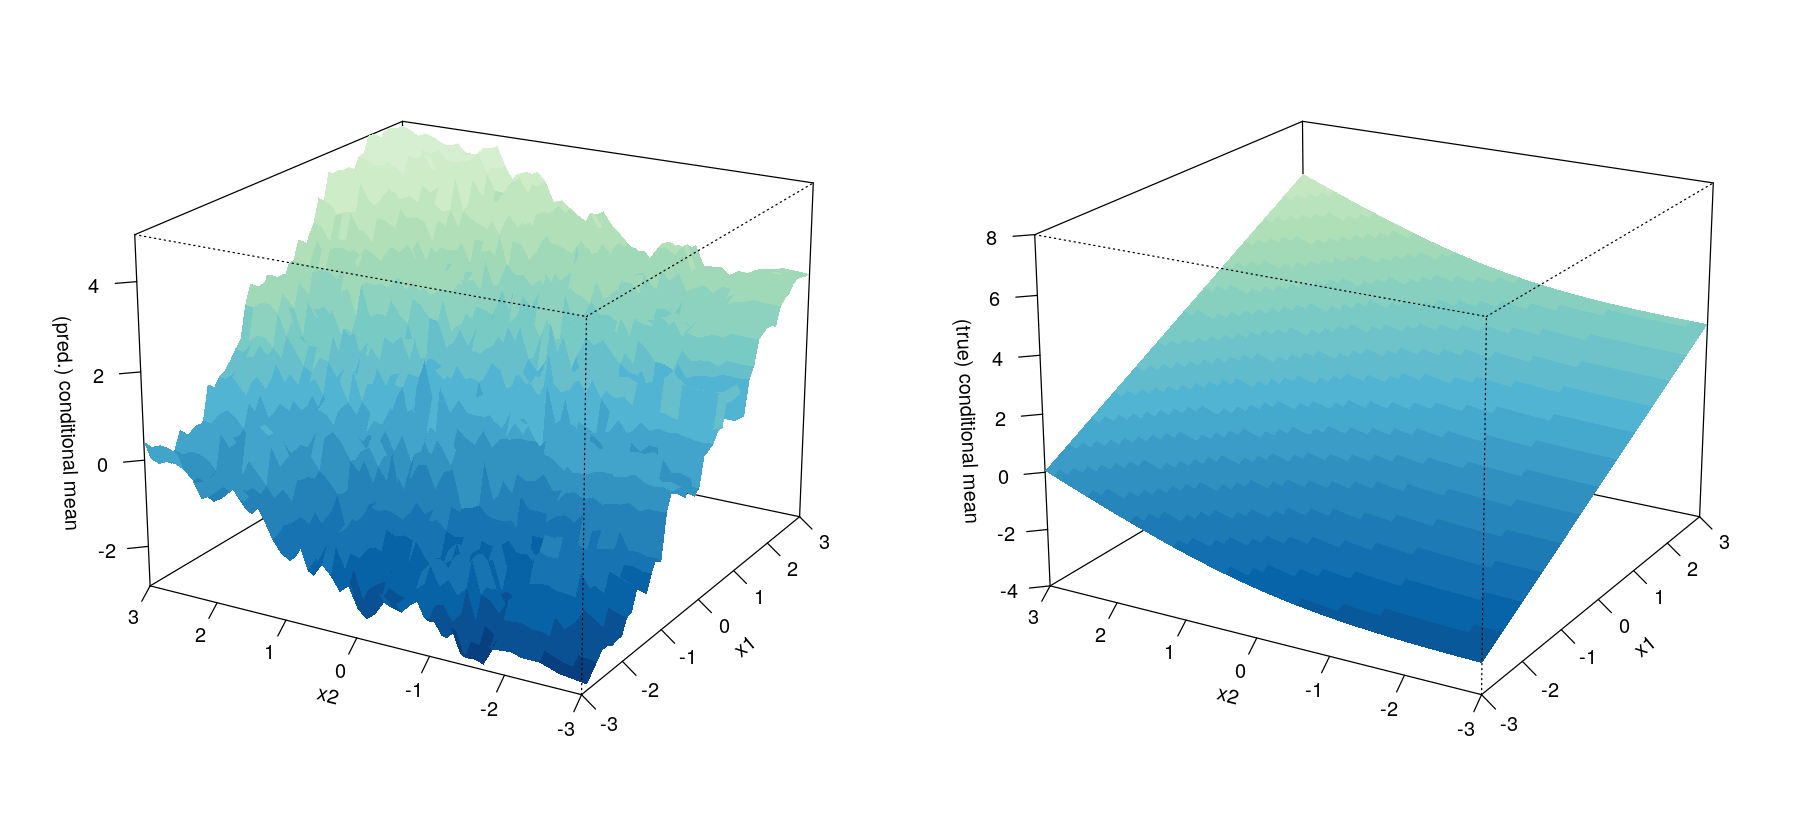

In [54]:
plot_surface("rf", "boundary", d=2, n=5000)

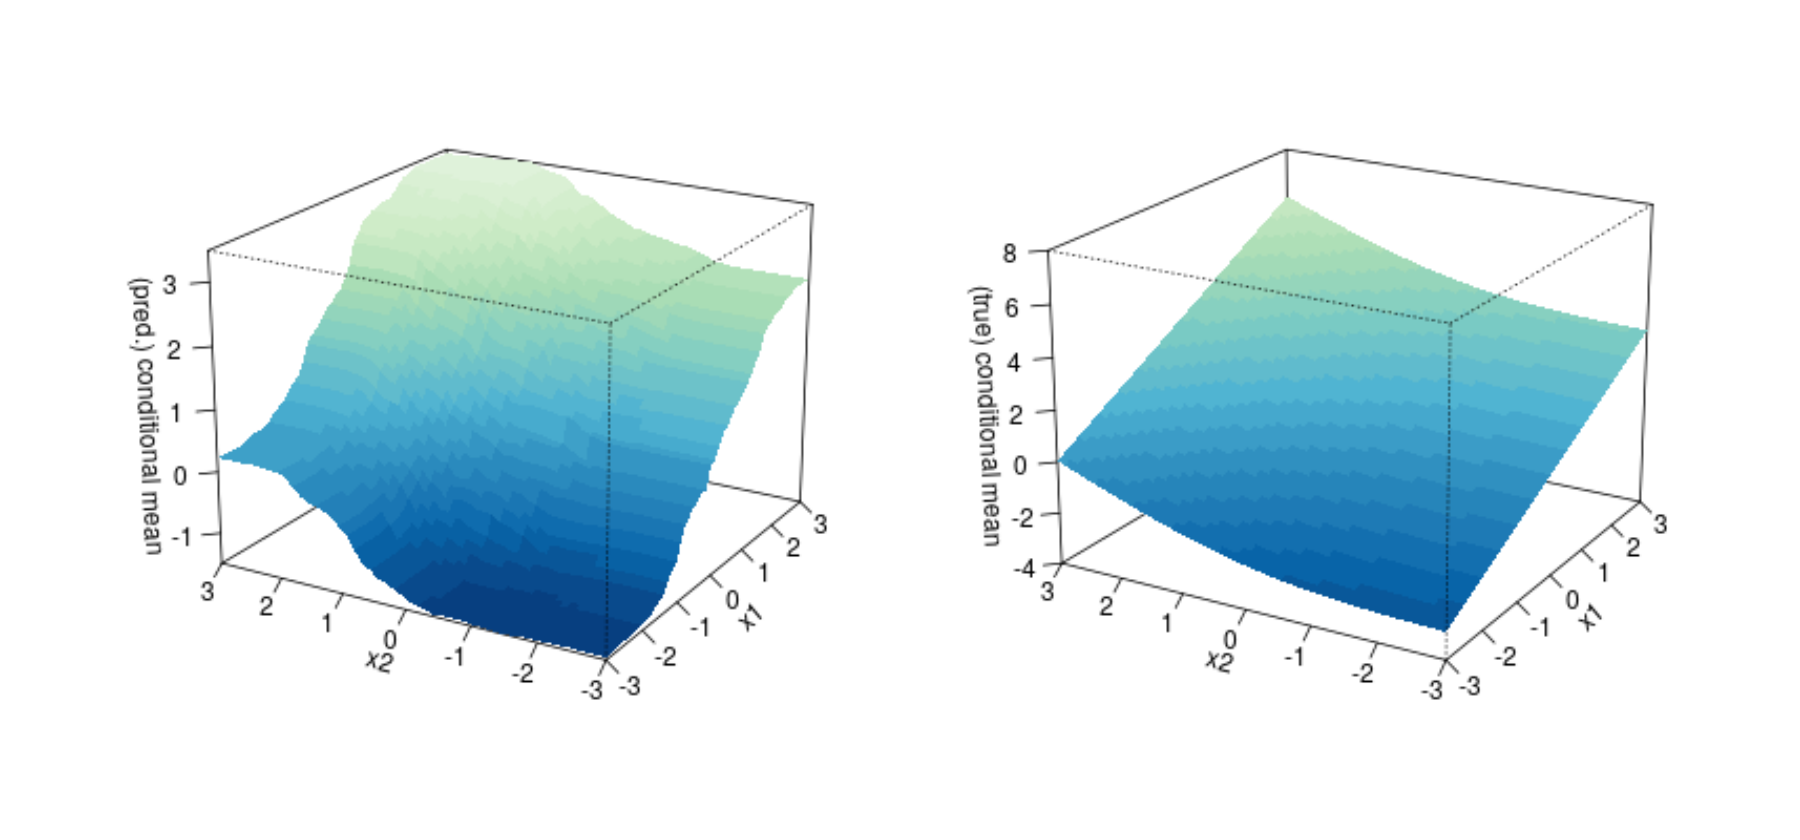

In [57]:
plot_surface("grf", "boundary", d=2, n=5000)

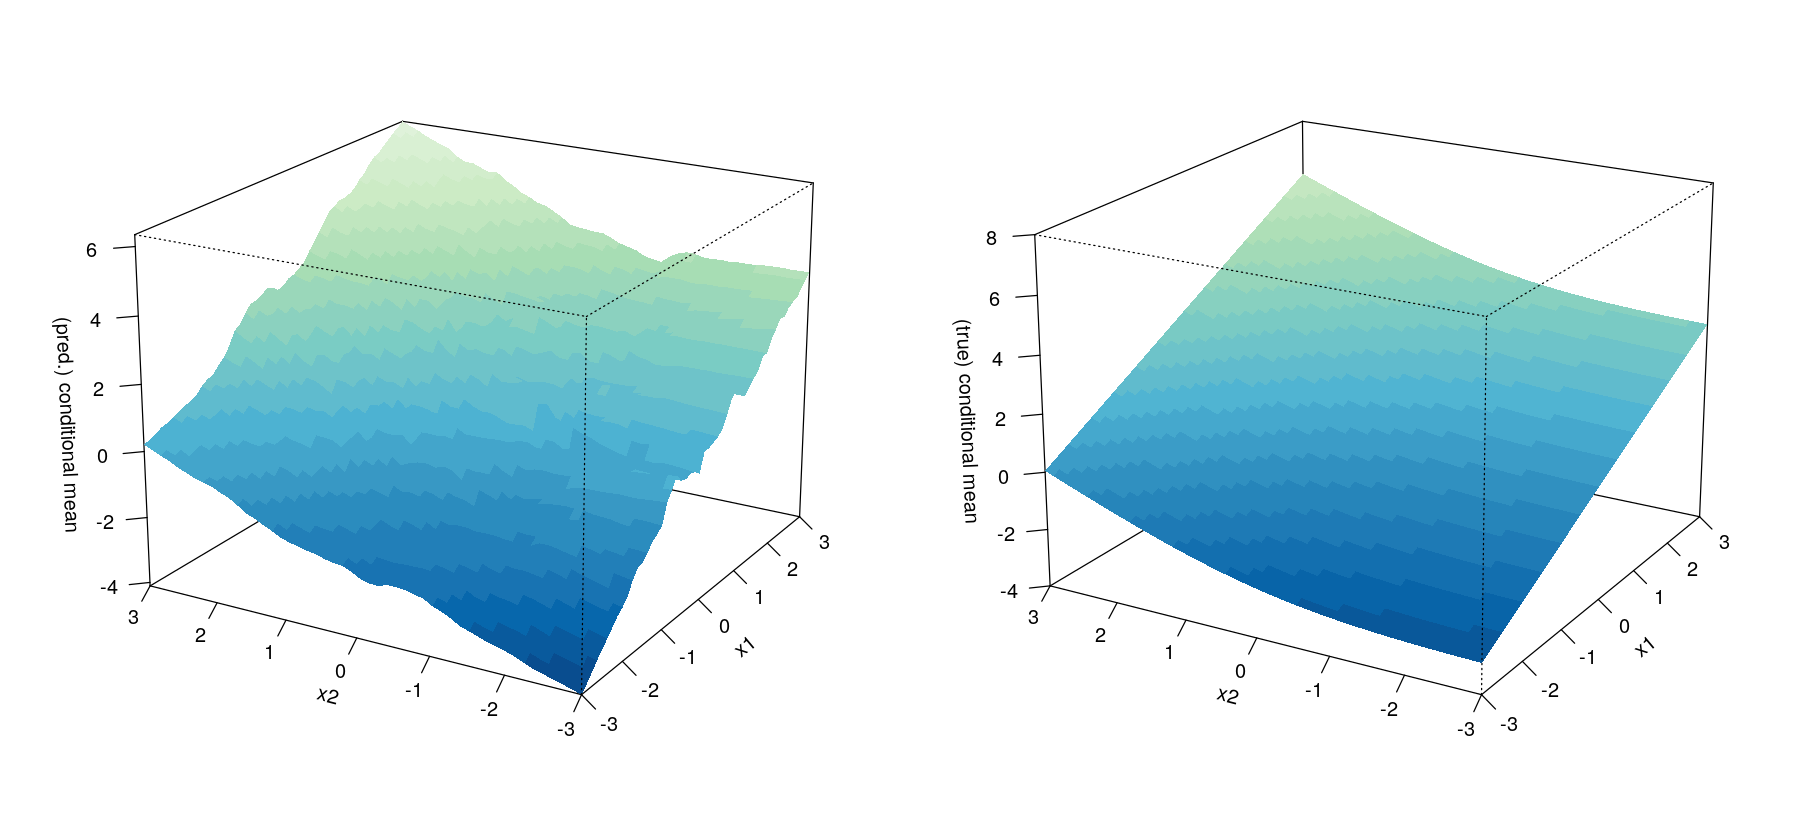

In [60]:
plot_surface("llf", "boundary", d=2, n=5000)

## References

#### K-NN, Linear Models, (classical) Random Forest
- [Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf), Hastie et al., 2001


#### T-Learner Methods
- [Meta-learners for Estimating Heterogeneous Treatment Effects using Machine Learning](https://arxiv.org/abs/1706.03461), Kuenzel et al., 2019


#### Causal Forest, GRF, Local-Linear Forest
- [Recursive partitioning for heterogeneous causal effects](https://www.pnas.org/content/113/27/7353), Athey and Imbens, 2017
- [Estimation and Inference of Heterogeneous Treatment Effects using Random Forests](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1319839), Athey and Wager, 2018
- [Generalized Random Forests](https://arxiv.org/abs/1610.01271), Athey, Wager and Tibshirani, 2018
- [Local Linear Forsts](https://arxiv.org/abs/1807.11408), Athey et al., 2019


#### Cross-Validation
- [Quasi-Oracle Estimation of Heterogeneous Treatment Effects](https://arxiv.org/abs/1712.04912), Nie and Wager, 2019